# ПЗ 1. Ярошенко Ярослав. КНТу-22-1. Варіант - 7. 

# Dataset - wine

In [2]:
from pycaret.datasets import get_data
Data = get_data('wine')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [3]:
data = Data.sample(frac=0.90, random_state=786)
data_unseen = Data.drop(data.index)

data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

# print the revised shape
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (5847, 13)
Unseen Data For Predictions: (650, 13)


In [7]:
Data.shape

(6497, 13)

In [9]:
Data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


<Axes: >

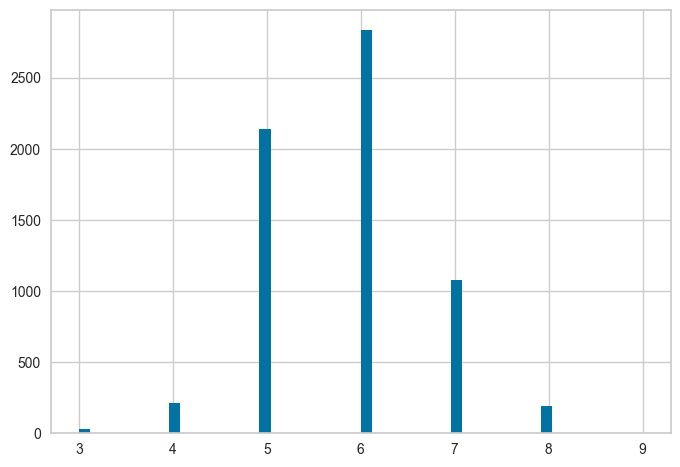

In [9]:
Data.quality.hist(bins=50)

# Опис датасету "wine.csv"

Даний датасет містить хімічні характеристики червоних і білих вин, а також їхню оцінку якості. Він використовується для аналізу факторів, що впливають на якість вина, побудови моделей машинного навчання для прогнозування оцінки якості та проведення дослідницького аналізу даних.

## Загальна інформація про датасет
- Кількість записів: **6497**  
- Кількість ознак: **13**  
- Типи змінних:  
  - **11 числових** (`float64`)  
  - **1 цілочисельна** (`int64`)  
  - **1 категоріальна** (`object`)  

## Опис ознак

### Хімічні характеристики:
- **`fixed acidity` (фіксована кислотність)** – місткість некарбонатних кислот у вині.  
  - Діапазон значень: **3.8 – 15.9**  
  - Середнє значення: **7.21**  

- **`volatile acidity` (летка кислотність)** – місткість оцтової кислоти, що впливає на смак вина.  
  - Діапазон значень: **0.08 – 1.58**  
  - Середнє значення: **0.34**  

- **`citric acid` (лимонна кислота)** – додає вину свіжості.  
  - Діапазон значень: **0.00 – 1.66**  
  - Середнє значення: **0.32**  

- **`residual sugar` (залишковий цукор)** – кількість цукру, що залишилася після бродіння.  
  - Діапазон значень: **0.6 – 65.8 г/л**  
  - Середнє значення: **5.44 г/л**  

- **`chlorides` (хлориди)** – концентрація солі у вині, що впливає на смак.  
  - Діапазон значень: **0.009 – 0.611 г/л**  
  - Середнє значення: **0.056 г/л**  

- **`free sulfur dioxide` (вільний діоксид сірки)** – місткість SO₂, що запобігає окисленню та розвитку бактерій.  
  - Діапазон значень: **1 – 289 мг/л**  
  - Середнє значення: **30.5 мг/л**  

- **`total sulfur dioxide` (загальний діоксид сірки)** – загальний вміст SO₂, що використовується як консервант.  
  - Діапазон значень: **6 – 440 мг/л**  
  - Середнє значення: **115.7 мг/л**  

- **`density` (щільність)** – щільність вина, що залежить від вмісту спирту та цукру.  
  - Діапазон значень: **0.9871 – 1.03898 г/см³**  
  - Середнє значення: **0.9947 г/см³**  

- **`pH` (кислотність)** – рівень pH вина, що впливає на його стабільність і смак.  
  - Діапазон значень: **2.72 – 4.01**  
  - Середнє значення: **3.22**  

- **`sulphates` (сульфати)** – рівень сульфатів, що впливають на аромат і смак вина.  
  - Діапазон значень: **0.22 – 2.00 г/л**  
  - Середнє значення: **0.53 г/л**  

- **`alcohol` (алкоголь)** – вміст спирту у вині (%).  
  - Діапазон значень: **8.0 – 14.9%**  
  - Середнє значення: **10.49%**  

### Цільова змінна:
- **`quality` (якість вина)** – оцінка якості за шкалою від **3 до 9** (цілочисельне значення).  

### Категоріальна ознака:
- **`type` (тип вина)** – категоріальна ознака, що позначає тип вина:  
  - `"red"` – червоне вино  
  - `"white"` – біле вино  

## Використання датасету
Цей датасет дозволяє проводити аналіз впливу різних хімічних характеристик на якість вина та використовувати ці дані для прогнозування якості на основі хімічного складу.


# Data Preparation

In [4]:
from pycaret import classification
s = classification.setup(data = Data,
                         train_size = 0.9,
                         target = 'quality', 
                         session_id=123)

,Description,Value
0,Session id,123
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6"
4,Original data shape,"(6497, 13)"
5,Transformed data shape,"(6497, 13)"
6,Transformed train set shape,"(5847, 13)"
7,Transformed test set shape,"(650, 13)"
8,Numeric features,11
9,Categorical features,1


In [5]:
# check transformed X_train
classification.get_config('X_train')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
1729,5.7,0.26,0.25,10.40,0.020,7.0,57.0,0.99400,3.39,0.37,10.6,white
3865,9.4,0.42,0.32,6.50,0.027,20.0,167.0,0.99479,3.08,0.43,10.6,white
1771,7.6,0.48,0.37,0.80,0.037,4.0,100.0,0.99020,3.03,0.39,11.4,white
4098,6.9,0.26,0.31,7.00,0.039,37.0,175.0,0.99376,3.32,0.49,11.4,white
1838,6.2,0.25,0.21,15.55,0.039,28.0,159.0,0.99820,3.48,0.64,9.6,white
...,...,...,...,...,...,...,...,...,...,...,...,...
4328,6.5,0.29,0.31,1.70,0.035,24.0,79.0,0.99053,3.27,0.69,11.4,white
740,8.3,0.76,0.29,4.20,0.075,12.0,16.0,0.99650,3.45,0.68,11.5,red
3887,7.4,0.33,0.26,15.60,0.049,67.0,210.0,0.99907,3.06,0.68,9.5,white
5650,6.8,0.30,0.27,11.60,0.028,22.0,97.0,0.99314,2.96,0.38,11.7,white


In [6]:
# list columns of transformed X_train 
classification.get_config('X_train').columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type'],
      dtype='object')

# Model Training & Selection

# Compare Models

In [7]:
# check available models
classification.models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [10]:
# train all models using default hyperparameters
best = classification.compare_models(exclude=['nb'], sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6898,0.4376,0.6898,0.6935,0.6778,0.5164,0.5216,0.4570
rf,Random Forest Classifier,0.6901,0.4335,0.6901,0.6947,0.6770,0.5165,0.5221,0.6510
lightgbm,Light Gradient Boosting Machine,0.6706,0.4187,0.6706,0.6674,0.6592,0.4891,0.4928,0.9550
dt,Decision Tree Classifier,0.6133,0.3573,0.6133,0.6143,0.6128,0.4256,0.4260,0.0680
gbc,Gradient Boosting Classifier,0.5976,0.0000,0.5976,0.5960,0.5799,0.3650,0.3724,3.3600
lda,Linear Discriminant Analysis,0.5357,0.0000,0.5357,0.5168,0.5127,0.2637,0.2697,0.0430
lr,Logistic Regression,0.5379,0.0000,0.5379,0.4939,0.4909,0.2435,0.2575,1.3730
knn,K Neighbors Classifier,0.4936,0.3319,0.4936,0.4811,0.4801,0.2150,0.2166,0.1170
qda,Quadratic Discriminant Analysis,0.4816,0.0000,0.4816,0.4940,0.4773,0.2483,0.2527,0.0480
ridge,Ridge Classifier,0.5357,0.0000,0.5357,0.4978,0.4695,0.2300,0.2486,0.0610


In [18]:
print(best)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


In [19]:
type(best)

sklearn.ensemble._forest.ExtraTreesClassifier

# Create Model

In [11]:
# train individual model
et = classification.create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7060,0.0000,0.7060,0.7028,0.6968,0.5461,0.5490
1,0.6632,0.0000,0.6632,0.6578,0.6467,0.4697,0.4786
2,0.6752,0.8688,0.6752,0.6802,0.6648,0.4945,0.4988
3,0.6838,0.8758,0.6838,0.6825,0.6723,0.5078,0.5127
4,0.7197,0.8905,0.7197,0.7353,0.7081,0.5626,0.5696
5,0.7043,0.8744,0.7043,0.7125,0.6911,0.5393,0.5445
6,0.6957,0.8667,0.6957,0.6991,0.6841,0.5267,0.5319
7,0.6764,0.0000,0.6764,0.6970,0.6642,0.4911,0.4982
8,0.6901,0.0000,0.6901,0.6871,0.6747,0.5158,0.5200


In [23]:
print(et)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


In [12]:
rf = classification.create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7179,0.0000,0.7179,0.7131,0.7073,0.5626,0.5665
1,0.6752,0.0000,0.6752,0.6766,0.6567,0.4847,0.4969
2,0.6786,0.8605,0.6786,0.6919,0.6677,0.4999,0.5041
3,0.6752,0.8615,0.6752,0.6798,0.6627,0.4920,0.4981
4,0.7231,0.8859,0.7231,0.7266,0.7107,0.5691,0.5752
5,0.7026,0.8679,0.7026,0.7078,0.6861,0.5337,0.5420
6,0.6889,0.8593,0.6889,0.6963,0.6776,0.5185,0.5222
7,0.6832,0.0000,0.6832,0.6998,0.6701,0.5040,0.5094
8,0.6832,0.0000,0.6832,0.6797,0.6669,0.5056,0.5098


In [13]:
knn = classification.create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4872,0.0000,0.4872,0.4792,0.4770,0.2131,0.2143
1,0.4581,0.0000,0.4581,0.4398,0.4420,0.1554,0.1573
2,0.5128,0.6784,0.5128,0.5132,0.5002,0.2453,0.2470
3,0.4821,0.6447,0.4821,0.4710,0.4693,0.1990,0.2003
4,0.5179,0.6764,0.5179,0.5034,0.5034,0.2495,0.2518
5,0.4615,0.6459,0.4615,0.4443,0.4477,0.1651,0.1662
6,0.5043,0.6739,0.5043,0.4803,0.4866,0.2288,0.2305
7,0.5205,0.0000,0.5205,0.5073,0.5064,0.2558,0.2581
8,0.4983,0.0000,0.4983,0.4930,0.4874,0.2232,0.2243


# Tune Hyperparameters

In [14]:
# tune hyperparameters of model
tuned_et = classification.tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5419,0.0000,0.5419,0.5182,0.4953,0.2458,0.2630
1,0.5436,0.0000,0.5436,0.5086,0.4916,0.2465,0.2654
2,0.5368,0.7302,0.5368,0.4993,0.4892,0.2395,0.2544
3,0.5299,0.7255,0.5299,0.4910,0.4790,0.2268,0.2415
4,0.5504,0.7357,0.5504,0.5470,0.5038,0.2581,0.2786
5,0.5829,0.7601,0.5829,0.5646,0.5397,0.3172,0.3363
6,0.5470,0.7445,0.5470,0.5090,0.5042,0.2597,0.2751
7,0.5497,0.0000,0.5497,0.5228,0.5025,0.2580,0.2770
8,0.5548,0.0000,0.5548,0.5159,0.5048,0.2723,0.2855


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [28]:
print(tuned_et)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


In [27]:
print(et)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


In [15]:
import numpy as np
tuned_knn = classification.tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5282,0.0000,0.5282,0.5448,0.5222,0.2918,0.2977
1,0.4957,0.0000,0.4957,0.4912,0.4764,0.2355,0.2426
2,0.4957,0.6768,0.4957,0.5279,0.4865,0.2369,0.2421
3,0.4752,0.6769,0.4752,0.4968,0.4622,0.2116,0.2181
4,0.5043,0.6893,0.5043,0.5154,0.4983,0.2572,0.2612
5,0.4974,0.6773,0.4974,0.5229,0.4887,0.2398,0.2430
6,0.5026,0.6762,0.5026,0.5135,0.4974,0.2600,0.2641
7,0.5017,0.0000,0.5017,0.5176,0.4933,0.2523,0.2578
8,0.5411,0.0000,0.5411,0.5699,0.5329,0.3053,0.3134


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [16]:
tuned_rf = classification.tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5504,0.0000,0.5504,0.5175,0.5193,0.2822,0.2893
1,0.5350,0.0000,0.5350,0.5014,0.5086,0.2589,0.2664
2,0.5419,0.7140,0.5419,0.5068,0.5143,0.2702,0.2764
3,0.5299,0.7094,0.5299,0.5070,0.5113,0.2600,0.2638
4,0.5590,0.7279,0.5590,0.5367,0.5314,0.2942,0.3033
5,0.5641,0.7213,0.5641,0.5335,0.5367,0.3042,0.3125
6,0.5521,0.7163,0.5521,0.5133,0.5237,0.2852,0.2922
7,0.5514,0.0000,0.5514,0.5314,0.5252,0.2814,0.2897
8,0.5445,0.0000,0.5445,0.4990,0.5065,0.2708,0.2779


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# Plot Model

In [18]:
classification.plot_model(tuned_rf, plot = 'auc')

ValueError: Found input variables with inconsistent numbers of samples: [3900, 4550]

<Figure size 800x550 with 0 Axes>

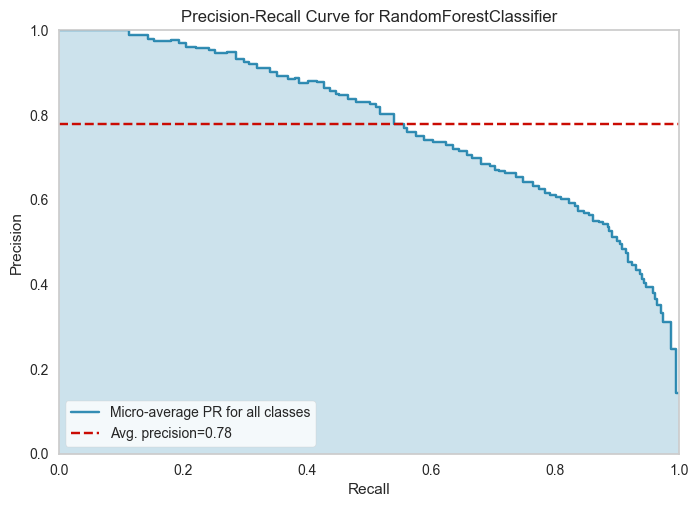

In [55]:
classification.plot_model(tuned_rf, plot = 'pr')

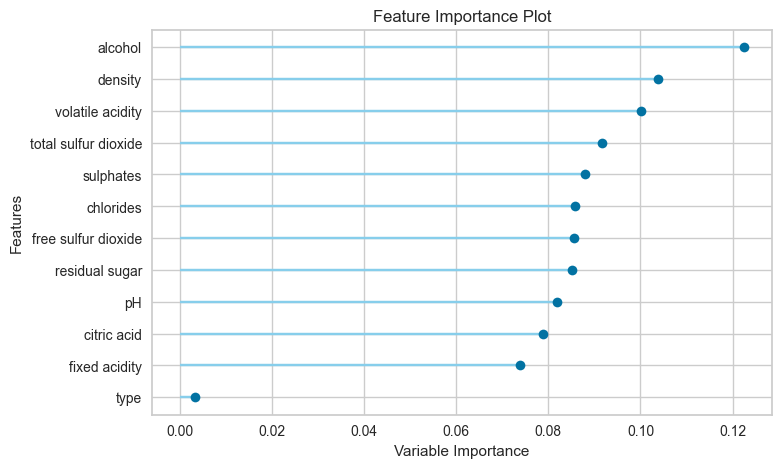

In [37]:
classification.plot_model(tuned_rf, plot='feature_all')

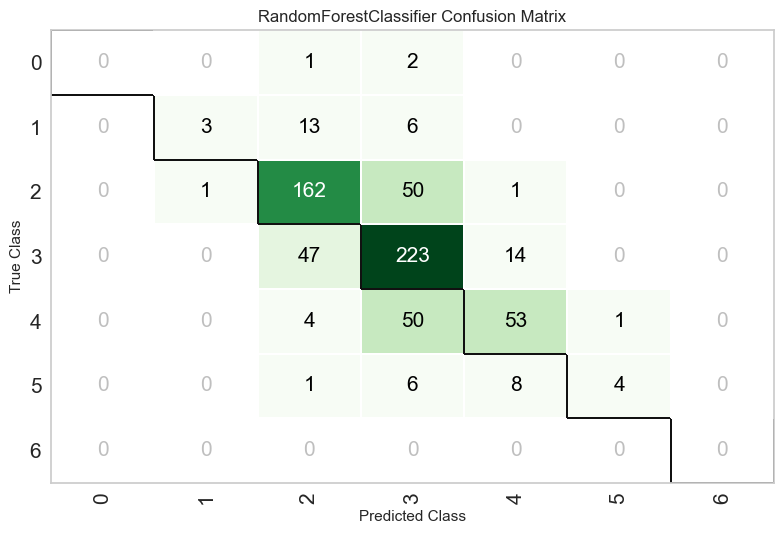

In [38]:
classification.plot_model(tuned_rf, plot = 'confusion_matrix')

In [39]:
classification.evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Prediction

In [56]:
classification.predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6846,0,0.6846,0.6877,0.6684,0.5058,0.5110


In [57]:
# finalize rf model
final_rf = classification.finalize_model(tuned_rf)
# print final model parameters
print(final_rf)

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                              

In [58]:
classification.predict_model(final_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,1.0000,0,1.0000,1.0000,1.0000,1.0000,1.0000


In [71]:
unseen_predictions = classification.predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality,prediction_label,prediction_score
0,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,red,5,5,0.98
1,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,red,7,7,0.58
2,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,red,5,5,0.98
3,7.8,0.61,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,red,5,5,0.81
4,7.4,0.59,0.08,4.4,0.086,6.0,29.0,0.9974,3.38,0.50,9.0,red,4,4,0.69


In [75]:
unseen_predictions[unseen_predictions['prediction_score'] > 0.90]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality,prediction_label,prediction_score
0,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.400000,red,5,5,0.98
2,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,red,5,5,0.98
6,7.3,0.45,0.36,5.9,0.074,12.0,87.0,0.99780,3.33,0.83,10.500000,red,5,5,0.93
7,7.5,0.63,0.12,5.1,0.111,50.0,110.0,0.99830,3.26,0.77,9.400000,red,5,5,0.98
8,7.7,0.67,0.23,2.1,0.088,17.0,96.0,0.99620,3.32,0.48,9.500000,red,5,5,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,6.0,0.24,0.41,1.3,0.036,42.0,118.0,0.99018,3.04,0.64,11.733334,white,6,6,0.96
625,6.0,0.24,0.41,1.3,0.036,42.0,118.0,0.99018,3.04,0.64,11.750000,white,6,6,0.95
632,6.8,0.27,0.30,13.0,0.047,69.0,160.0,0.99705,3.16,0.50,9.600000,white,6,6,0.99
633,5.8,0.30,0.09,6.3,0.042,36.0,138.0,0.99382,3.15,0.48,9.700000,white,5,5,0.93


In [19]:
# check metric on unseen data
from pycaret.utils import check_metric
check_metric(unseen_predictions['default'], unseen_predictions['Label'], metric = 'AUC')

ImportError: cannot import name 'check_metric' from 'pycaret.utils' (C:\Users\Dasha\anaconda3\envs\PyCaret\Lib\site-packages\pycaret\utils\__init__.py)

# Save model

In [79]:
# saving the final model
classification.save_model(final_rf,'final_rf_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
               

In [80]:
# loading the saved model
saved_final_rf = classification.load_model('final_rf_model')

Transformation Pipeline and Model Successfully Loaded


In [81]:
# predict on new data
new_prediction = classification.predict_model(saved_final_rf, data=data_unseen)
new_prediction.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality,prediction_label,prediction_score
0,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,red,5,5,0.98
1,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,red,7,7,0.58
2,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,red,5,5,0.98
3,7.8,0.61,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,red,5,5,0.81
4,7.4,0.59,0.08,4.4,0.086,6.0,29.0,0.9974,3.38,0.50,9.0,red,4,4,0.69


In [20]:
from pycaret.utils import check_metric
check_metric(new_prediction['default'], new_prediction['Label'], metric = 'AUC')

ImportError: cannot import name 'check_metric' from 'pycaret.utils' (C:\Users\Dasha\anaconda3\envs\PyCaret\Lib\site-packages\pycaret\utils\__init__.py)